# Deep Learning with Neural Networks

Classical machine learning relies on using statistics to determine relationships between features and labels, and can be very effective for creating predictive models. However, a massive growth in the availability of data coupled with advances in the computing technology required to process it has led to the emergence of new machine learning techniques that mimic the way the brain processes information in a structure called an artificial neural network.

While in most "real-world" scenarios, you should use a specialist deep learning training framework, like PyTorch; you can use Scikit-Learn to train simple neural network models. In this example, we'll use a neural network to classify wheat seeds into their species based on their measurements.


In [2]:
import pandas as pd

# load the training dataset
seeds= pd.read_csv('../../generated/data/raw/seeds.csv')

# Display a random sample of 10 observations
sample = seeds.sample(10)
print(sample)

      area  perimeter  compactness  kernel_length  kernel_width  \
28   14.11      14.18       0.8820          5.541         3.221   
60   11.42      12.86       0.8683          5.008         2.850   
193  10.82      12.83       0.8256          5.180         2.630   
8    16.63      15.46       0.8747          6.053         3.465   
21   14.11      14.26       0.8722          5.520         3.168   
185  11.56      13.31       0.8198          5.363         2.683   
13   13.78      14.06       0.8759          5.479         3.156   
172  11.27      12.97       0.8419          5.088         2.763   
162  12.05      13.41       0.8416          5.267         2.847   
12   13.89      14.02       0.8880          5.439         3.199   

     asymmetry_coefficient  groove_length  species  
28                   2.754          5.038        0  
60                   2.700          4.607        0  
193                  4.853          5.089        2  
8                    2.040          5.877        0

To separate the features from the label, and then split the data into datasets for training and testing

In [3]:
from sklearn.model_selection import train_test_split

seed_features = ['area','perimeter','compactness','kernel_length','kernel_width','asymmetry_coefficient','groove_length']
seed_label = 'species'

# Separate features and labels
seeds_X, seeds_y = seeds[seed_features].values, seeds[seed_label].values

# Split data 70%-30% into training set and test set
x_seeds_train, x_seeds_test, y_seeds_train, y_seeds_test = train_test_split(seeds_X, seeds_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=seeds_y)

print ('Training Set: %d, Test Set: %d \n' % (x_seeds_train.shape[0], x_seeds_test.shape[0]))

Training Set: 147, Test Set: 63 



To use the MLClassifier algorithm to train a *multi-layer perceptron*, which is a type of neural network.

Note:
In this case, we'll create a network with three hidden layers, each with 30 neurons.

In [4]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', learning_rate_init=0.01, learning_rate='adaptive')
mlp_model.fit(x_seeds_train, y_seeds_train)

print(mlp_model)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate='adaptive',
              learning_rate_init=0.01)


C:\Users\nobu\Documents\Python\learning-ml-models\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


To evaluate the model with the test data we held back.

In [5]:
from sklearn. metrics import classification_report

seed_predictions = mlp_model.predict(x_seeds_test)
print('Predicted labels: ', seed_predictions[:15])
print('Actual labels   : ', y_seeds_test[:15])

print("\nMetrics:\n",classification_report(y_seeds_test, seed_predictions))

Predicted labels:  [0 2 1 2 1 0 0 1 2 2 2 1 2 2 0]
Actual labels   :  [1 2 1 0 1 0 0 1 2 2 0 1 2 2 0]

Metrics:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.95      0.95      0.95        21
           2       0.87      0.95      0.91        21

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.90        63



To visualize the confusion matrix for our model.

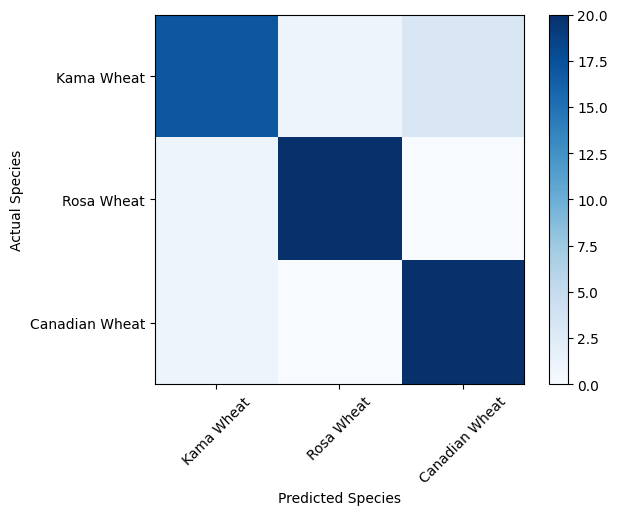

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

seed_classes = ['Kama Wheat', 'Rosa Wheat', 'Canadian Wheat']

# Plot the confusion matrix
mcm = confusion_matrix(y_seeds_test, seed_predictions)
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(seed_classes))
plt.xticks(tick_marks, seed_classes, rotation=45)
plt.yticks(tick_marks, seed_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

To save the model.

In [7]:
import joblib

# Save the model as a pickle file
filename = '../../generated/models/mlp_model.pkl'
joblib.dump(mlp_model, filename)

['../../generated/models/mlp_model.pkl']

To load and use the model to predict the classes for new seed observations.

In [8]:
# Load the model from the file
mlp_model = joblib.load(filename)

# Two new seed observations
x_new = np.array([[12.73,13.75,0.8458,5.412,2.882,3.533,5.067],
                  [17.63,15.98,0.8673,6.191,3.561,4.076,6.06]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = mlp_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + seed_classes[prediction] +')')

New samples:
[[12.73   13.75    0.8458  5.412   2.882   3.533   5.067 ]
 [17.63   15.98    0.8673  6.191   3.561   4.076   6.06  ]]
0 (Kama Wheat)
1 (Rosa Wheat)


## Summary

To trained a neural network model to perform classification.